In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('seturl2.csv', encoding = 'utf-8') 
df = pd.DataFrame(df)
col = ['label','url']
df = df[col]
df.columns = ['label', 'url'] #obrnuto
df['category_id'] = df['label'].factorize()[0]
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)
df.head()


,label,url,category_id
0,0,https://www.drive.google.com,0
1,0,www.gmail.google.com,0
2,0,http://facebook.com,0
3,0,https://yahoo.com,0
4,1,001web.net,1


<AxesSubplot:>

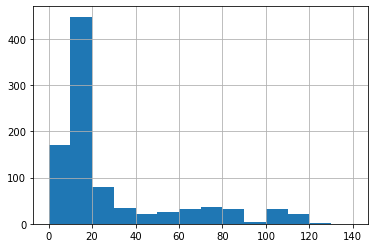

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
lens = df.url.str.len()
lens.hist(bins = np.arange(0,150,10))


In [21]:
def tokenize(input):
    tokenspos = str(input.encode('utf-8')).split('/')
    alltokens=[]
    for i in tokenspos:
        tokens = str(i).split('-')
        tokenspot = []
        for j in range(0,len(tokens)):
            temptokens = str(tokens[j]).split('.')
            tokentpot = tokenspot + temptokens
        alltokens = alltokens + tokens + tokenspot
    alltokens = list(set(alltokens))
    if 'com' in alltokens:
        alltokens.remove('com')
    return alltokens

In [22]:
y = [d[1]for d in df] #kategorije
myurls = [d[0]for d in df] #urlovi
vectorizer = TfidfVectorizer( tokenizer=tokenize ,use_idf=True, smooth_idf=True, sublinear_tf=False)
features = vectorizer.fit_transform(df.url).toarray()
labels = df.label
features.shape

(1000, 1553)

In [23]:
#TOČNOST NAKON PROŠIRENJA SKUPA PODATAKA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.20, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
clf = LogisticRegression(random_state=0) 
clf.fit(X_train,y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('točnost učenje =', train_score)
print ('točnost test =', test_score)

točnost učenje = 0.9425
točnost test = 0.925
